```Date 09/05/23```
<p>Name:- Krishna Mundada<p>
<p>Roll No:- 45 </p>
<p>Batch:- E3</p>
<p>Practical 8</p>
<p>Topic:- Recurrent Neural Network  </p>
<hr>
<hr>

Aim:- Write a program to implement RNN on sunspots data set for different times steps as  and compare the result for training and test accuracy also find train and testing accuracy with LSTM.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [3]:
# Load the sunspot dataset
df = pd.read_csv('./Sunspots.csv')
data = df['Monthly Mean Total Sunspot Number'].values

In [4]:
# Normalize the data
mean = np.mean(data)
std = np.std(data)
data = (data - mean) / std

In [5]:
# Create the dataset
sequence_length = 12
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
X = np.array(X)
y = np.array(y)

In [6]:
# Split the dataset into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [7]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
163/163 [==============================] - 7s 23ms/step - loss: 0.2374 - val_loss: 0.1266
Epoch 2/50
163/163 [==============================] - 3s 20ms/step - loss: 0.1533 - val_loss: 0.1194
Epoch 3/50
163/163 [==============================] - 3s 20ms/step - loss: 0.1446 - val_loss: 0.1138
Epoch 4/50
163/163 [==============================] - 3s 21ms/step - loss: 0.1453 - val_loss: 0.1183
Epoch 5/50
163/163 [==============================] - 3s 21ms/step - loss: 0.1449 - val_loss: 0.1138
Epoch 6/50
163/163 [==============================] - 4s 22ms/step - loss: 0.1424 - val_loss: 0.1160
Epoch 7/50
163/163 [==============================] - 4s 24ms/step - loss: 0.1431 - val_loss: 0.1157
Epoch 8/50
163/163 [==============================] - 4s 23ms/step - loss: 0.1414 - val_loss: 0.1139
Epoch 9/50
163/163 [==============================] - 4s 25ms/step - loss: 0.1417 - val_loss: 0.1136
Epoch 10/50
163/163 [==============================] - 4s 24ms/step - loss: 0.1401 - val_lo

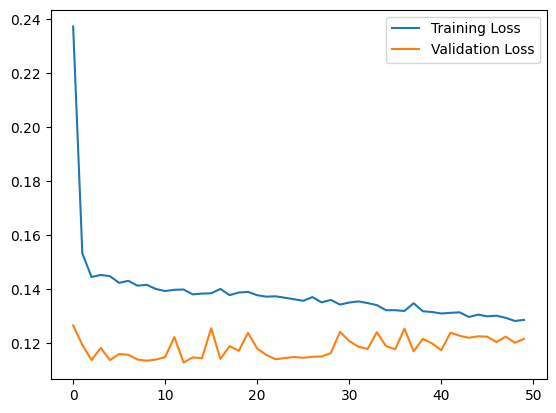

In [9]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

21/21 [==============================] - 0s 7ms/step


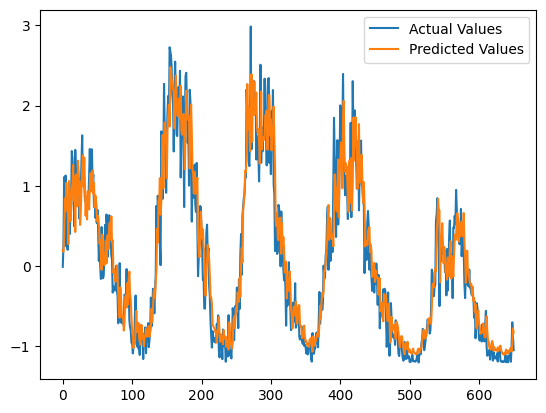

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Plot the predictions against the actual values
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()